<h2>KLASTERIZÁCIA (K-MEANS)</h2>

Zo stránky https://www.superdatascience.com/machine-learning/ stiahneme súbor <strong>Machine Learning A-Z (Codes and Datasets).zip</strong>.

Z tohto archívu nás zaujíma súbor <strong>Mall_Customers.csv</strong>, nájdeme v ňom teda tento súbor (je v <em>Part 4: Clustering - Section 25 - K-Means Clustering</em>). Dáme ho do priečinka, kde sa nachádza aj tento notebook (ipynb súbor). Budú teda v tom istom priečinku. Nakoľko csv súbory Excel nie vždy otvára správne, otvoríme ho priamo v JupyterLab alebo Google Colab alebo online pomocou stránky https://limonte.github.io/csv-viewer-online/ .

V tejto tabuľke sa nachádzajú údaje o zákazníkoch - ich vek, príjem a skóre ich utrácania. Týchto zákazníkov chceme rozdeliť do skupín, avšak nemáme vopred určené do akých (nemáme závislú premennú) a nemáme žiadne trénovacie dáta. Ide teda o problém učenia bez učiteľa - klasterizáciu. Zaradením zákazníkov do skupín vytvoríme vlastnú závislú premennú. Jednou z metód klasterizácie je k-means.

Krátku ukážku fungovania klasterizácie k-means vidíme tu:<br /><img src="http://mvi.mechatronika.cool/sites/default/files/obrazky/cluster1.png" />
<br /><img src="http://mvi.mechatronika.cool/sites/default/files/obrazky/cluster2.png" />

Spustíme kód, ktorý nám importuje potrebné knižnice:

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importujeme náš dataset. Chceme tretí a štvrtý stĺpec (ak rátame stĺpce od 0), teda <em>Annual Income</em> a <em>Spending Score</em>:

In [4]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3,4]].values

Ďalším krokom je využitie metódy <em>elbow method</em>, pomocou ktorej zistíme optimálny počet klastrov. Táto metóda využíva metriku <b>WCSS</b>, čo je suma druhých mocnín (štvorcov) vzdialeností každého bodu (každej dátovej jednotky) v jednotlivých klastrov od ich centroidu.<br /><img src="http://mvi.mechatronika.cool/sites/default/files/obrazky/cluster3.png" />

Elbow method použijeme tak, že urobíme klasterizáciu viac razy, teda s rôznymi počtami klastrov. Vypočítame WCSS pre jednotlivé prípady a z grafu vyčítame optimálny počet klastrov, pričom je treba dodať, že toto často závisí od ľudského faktora a optimálny počet nemusí byť zrejmý na prvý pohľad..<br /><img src="http://mvi.mechatronika.cool/sites/default/files/obrazky/cluster4.png" />

Na toto potrebujeme importovať potrebné knižnice a spustiť samotnú klasterizáciu s rôznymi počtami klastrov:

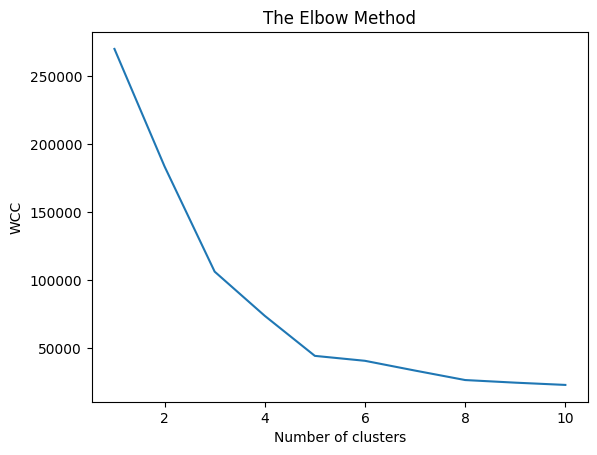

In [5]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCC')
plt.show()

Vidíme z grafu, že optimálny počet klastrov bude 5.

Využijeme teda počet klastrov 5 a zároveň vytvoríme závislú premennú, ktorá bude ukladať príslušnosť daného riadka v datasete ku klastru:

In [6]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

print (y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


Teraz si klastre vizualizujeme:

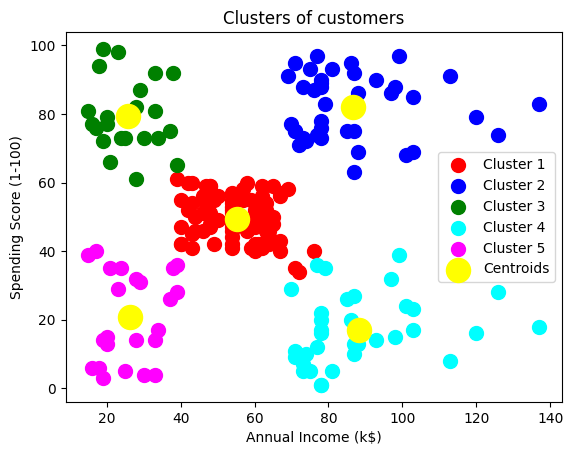

In [7]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

V grafe prehľadne vidíme jednotlivé klastre podľa farby bodov a takisto centroidy, ktoré sú žlté. Na základe tohto vieme získať nové pohľady na našich zákazníkov a podľa klastrov im napríklad ponúknuť rozdielne akciové ponuky.

Program je hotový. Prečítame si a <strong>splníme úlohu</strong> na konci nášho dokumentu k cvičeniu.